<a href="https://colab.research.google.com/github/manikanta5557/simple_machine_learning-Notebooks/blob/main/Heart_Disease_Detection_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df['target'].unique()

array([0, 1])

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [6]:
df.isnull().sum()
#it has no empty values and all are integer vales

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization Tasks

 Create a bar plot that shows the total counts per target value.**

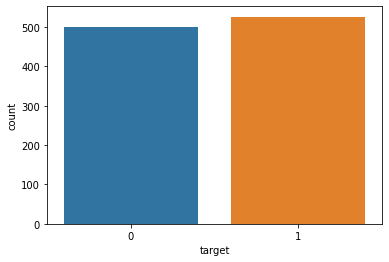

In [9]:
sns.countplot(x='target',data = df)

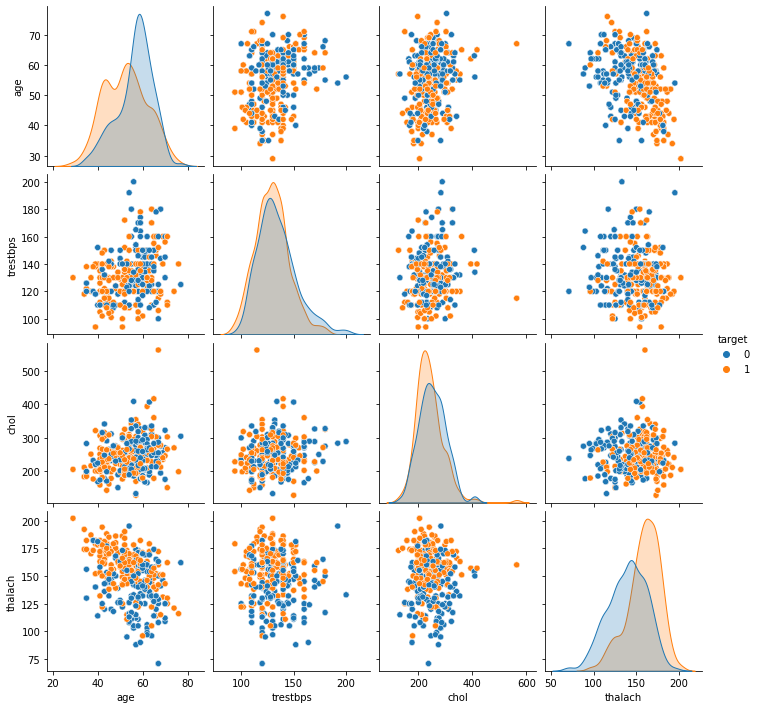

In [9]:
hu=['age','trestbps', 'chol','thalach','target']
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

Create a heatmap that displays the correlation between all the columns.**

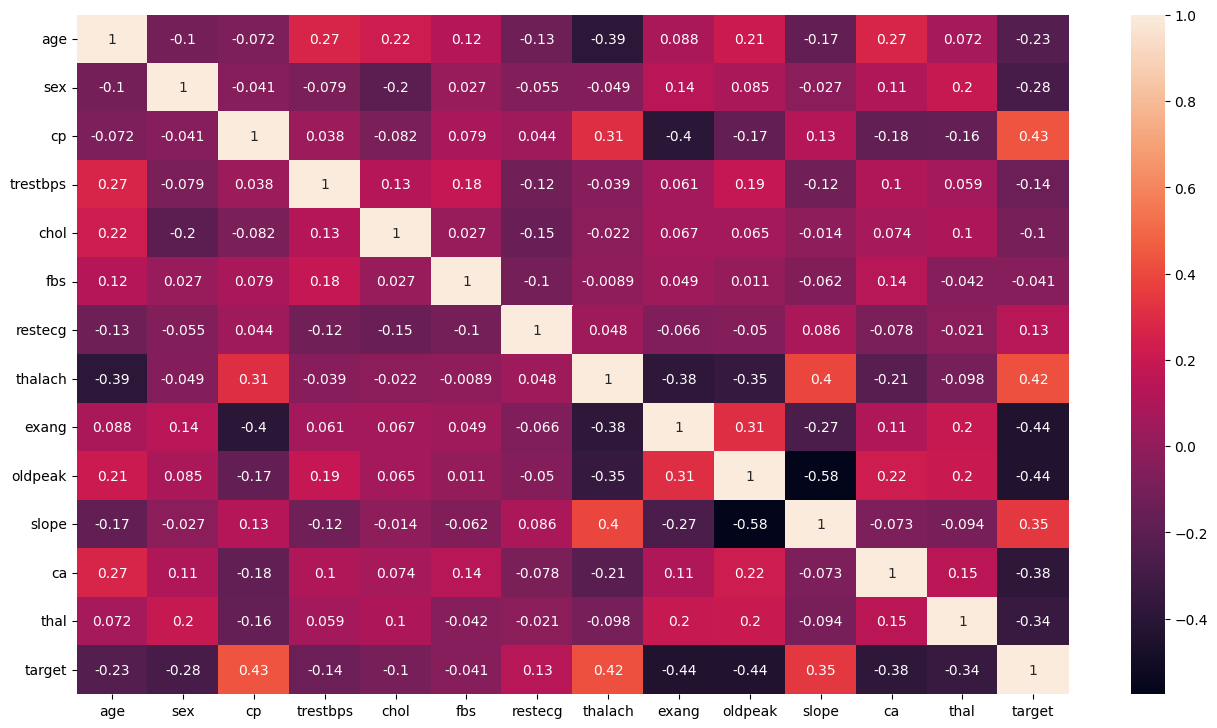

In [17]:
plt.figure(figsize=(16,9),dpi=100)
sns.heatmap(df.corr(),annot=True)


Separate the features from the labels into 2 objects, X and y.**

In [18]:
X=df.drop('target',axis=1)
y=df['target']


Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [19]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

 Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
scaler_x_train =scaler.fit_transform(X_train)
scaler_x_test = scaler.transform(X_test)

## Logistic Regression Model

Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [28]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
log_model = LogisticRegressionCV()

In [53]:
log_model.fit(scaler_x_train,y_train)

LogisticRegressionCV()

In [54]:
X_train.shape

(922, 13)

In [55]:
X_test.shape

(103, 13)

Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [56]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [57]:
log_model.C_

array([0.00599484])

### Coeffecients

**TASK: Report back the model's coefficients.**

In [58]:
log_model.coef_

array([[-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
        -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
         0.20479911, -0.32049603, -0.25727105]])

In [59]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [60]:
coefs = coefs.sort_values()

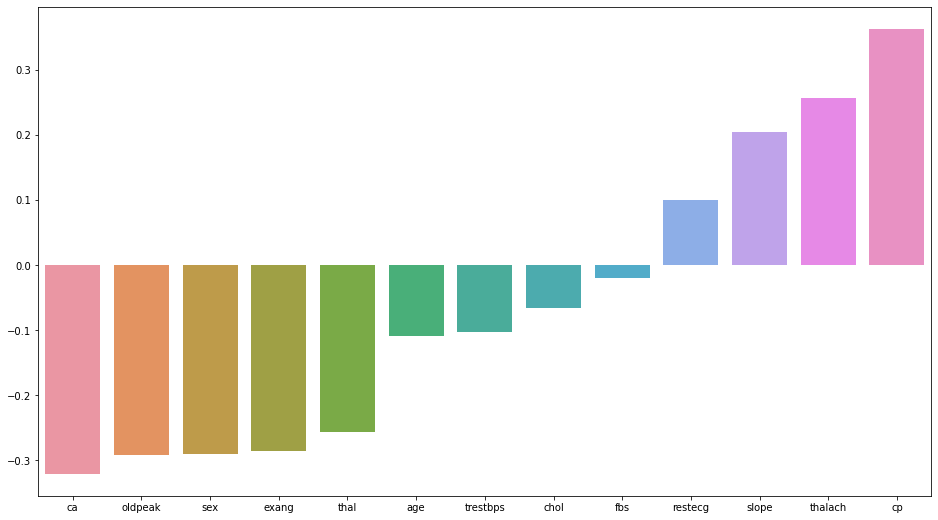

In [61]:
plt.figure(figsize=(16,9))
sns.barplot(x=coefs.index,y=coefs.values)

In [63]:
y_pred = log_model.predict(scaler_x_test)

---------

## Model Performance Evaluation

Let's now evaluate your model on the remaining 10% of the data, the test set.**

Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [43]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [64]:
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [ 5, 48]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


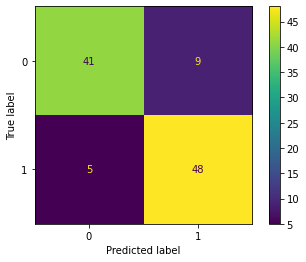

In [68]:
plot_confusion_matrix(log_model,scaler_x_test,y_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



### Performance Curves


Create both the precision recall curve and the ROC Curve.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


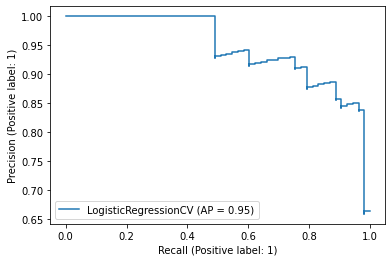

In [79]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(log_model,scaler_x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


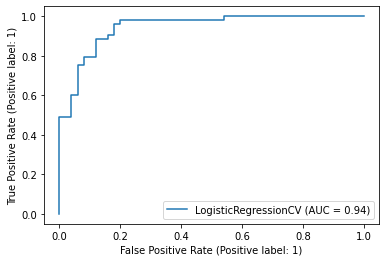

In [84]:
plot_roc_curve(log_model,scaler_x_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [90]:
patient = [[ 48. ,   0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. ,
          0.2,   2. ,   0. ,   2. ]]

In [91]:
print(log_model.predict(patient))

[0]


In [89]:
log_model.predict_proba(patient)

array([[9.99962215e-01, 3.77854601e-05]])